In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics.cluster import rand_score
import scipy.special as sc
import os
import visualization as an
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

In [32]:
blue =['#9addfb','#03a9f4'] 
yellow = ["#F8D890",'#E69F00']
red = ["#f1a495",'#ab2b2a']
colors = [blue,yellow,red]
FEATURE = ['Subj', 'Verb', 'Aux', 'AuxInvert', 
     'InitFunction', 'PreVFunction', 'PostVFunction',"VerbMorphology","FinalRise"]

### Proposed analysis
- add prosody in
- add simulation for morpho-syntactic features

In [10]:
sim_dir = 'Simultations/outputs/noisyS_parallel_10above/sims/'
noise_source = 'noisy_feature_0/'
# noise_level = '10_percent_noise/'
round_num = 'round_1/'

In [33]:
base_noisy_models = {}
target_noisy_models = {}
model_type = 'baseline_rounds/'
for feature_index in range(9):
    feature = FEATURE[feature_index]
    models = []
    for level in range(10,90,10):
        noise_source = f'noisy_feature_{str(feature_index)}/'        
        noise_level = f'{str(level)}_percent_noise/'
        model = an.results("eng",sim_dir+model_type+noise_source+noise_level+round_num, "iter_5000")
        models.append(model)
        base_noisy_models[feature] = models

In [35]:
model_type = 'target_rounds/'
for feature_index in range(9):
    feature = FEATURE[feature_index]
    models = []
    for level in range(10,90,10):
        noise_source = f'noisy_feature_{str(feature_index)}/'        
        noise_level = f'{str(level)}_percent_noise/'
        model = an.results("eng",sim_dir+model_type+noise_source+noise_level+round_num, "iter_5000")
        models.append(model)
        base_noisy_models[feature] = models

In [37]:
fig = plt.figure(figsize=(15, 8))
outer = gridspec.GridSpec(1, num, wspace=0.1)
ax = plt.Subplot(fig, inner[j])
fig.add_subplot(ax)

NameError: name 'num' is not defined

<Figure size 1080x576 with 0 Axes>

In [36]:
base_noisy_models[].heatmap()

KeyError: 0

In [38]:
base_noisy_models[''].heatmap()

KeyError: 0

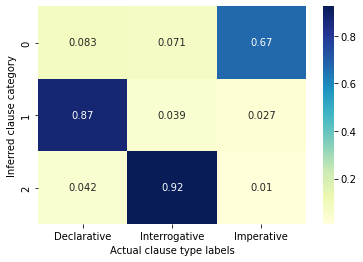

In [29]:
target_noisy_models[0].heatmap()

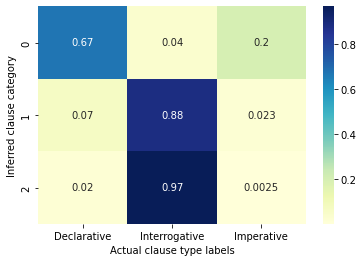

In [30]:
target_noisy_models[-1].heatmap()

In [39]:
input_dir = 'Simultations/input_data/'

In [40]:
df = pd.read_pickle(input_dir+"df_true")

In [41]:
df.columns

Index(['Session:Name', 'Record #', 'sequence', 'Speaker', 'Orthography',
       'orth_og', 'orth_aligned', 'orth_annt', 'Segment_manual', 'SpeechAct',
       'ClauseType', 'UttGoals', 'Subj', 'Obj', 'Verb', 'Aux', 'AuxInvert',
       'InitFunction', 'PreVFunction', 'PostVFunction', 'SubQ', 'SubI',
       'FollowUp?', 'ToAdults?', 'Situation', 'GRASP', 'Morphology',
       'Embedding', 'AnnotatorNotes', 'Subject', 'Modal', 'Modal_2',
       'DiscourseMarker', 'TagType', 'Q_status', 'EmbeddingVerb', 'S-lifting',
       'NEG', 'MultiEmbedding', 'Conventionalized', 'PerlocutionaryEffect',
       'Offer?', 'sp_raw', 'cl_raw', 'Notes', 'situation', 'Comments',
       'SubQcat', 'morphed_items', 'VerbMorphology', 'Atrue', 'Ctrue',
       'final_rise', 'ClauseType_split', 'ORTHOGRAPHY', 'Session', 'Child',
       'uttID', 'duplicated', 'start_manual', 'end_manual'],
      dtype='object')

In [42]:
df

(3923, 61)

In [119]:
with open(input_dir+'training_data','rb') as f:
    a_true = np.load(f,allow_pickle=True)
    c_true = np.load(f,allow_pickle=True)
    s0 = np.load(f,allow_pickle=True)
    s1 = np.load(f,allow_pickle=True)
    s2 = np.load(f,allow_pickle=True)
    s3 = np.load(f,allow_pickle=True)
    s4 = np.load(f,allow_pickle=True)
    s5 = np.load(f,allow_pickle=True)
    s6 = np.load(f,allow_pickle=True)
    s7 = np.load(f,allow_pickle=True)
    s8 = np.load(f,allow_pickle=True)
    s9 = np.load(f,allow_pickle=True)

In [44]:
s0.shape

(3923,)

In [45]:
from itertools import product 


In [123]:
S = [s0,s1,s2,s3,s4,s5,s6,s7,s9]

In [92]:
def simulate_a(delta,a):
    """mix noise into speech act labels
    Args:
        delta (int): proportion of noise in input
        a (np.array): speech act labels before simulation (e.g. a_true)

    Returns:
        a_sim: simuated speech act labels
    """
    a_sim = a.copy()
    a_uniq, counts = np.unique(a,return_counts = True)
    chance = np.random.choice(2, size=len(a), p = [delta/100,1-(delta/100)])
    for n in range(len(chance)):
        if chance[n] == 0:
            a_sim[n] = np.random.randint(len(a_uniq))
        else:
            a_sim[n] = a[n]
   
    return a_sim

In [90]:
np.unique(a_true,return_counts = True)

(array([0, 1, 2, 3]), array([1767, 1517,  571,   68]))

In [93]:
a_sim = simulate_a(10,a_true)

In [122]:
np.unique(s8,return_counts = True)

(array([0]), array([3923]))

In [121]:
s8

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
len(list(product(range(0,100,20), repeat=10))) #== 5**10

9765625

In [102]:
from copy import deepcopy

def recode_s(S,i):
    S_sim = deepcopy(S)
    S_sim[i] = 0
    return S_sim

In [107]:
c_init = np.random.randint(3, size=len(c_true))
c_sampled= c_init.copy()

In [124]:
 S_c_s_counts= np.array([xtab(c_sampled,s) for s in S])

In [106]:
Parallel(n_jobs=1)(delayed(sqrt)(i**2) for i in range(10))


[array([0, 1, 0, ..., 1, 0, 1]),
 array([1, 1, 1, ..., 1, 0, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 0, 0, ..., 1, 0, 0]),
 array([1, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 1, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0])]

In [6]:
from joblib import Parallel, delayed
import time
def slow_mean(data, sl):
    """Simulate a time consuming processing."""
    time.sleep(0.01)
    return data[sl].mean()

data = np.random.random((int(1e7),))
window_size = int(5e5)
slices = [slice(start, start + window_size)
          for start in range(0, data.size - window_size, int(1e5))]






Elapsed time computing the average of couple of slices 1.25 s

Elapsed time computing the average of couple of slices 1.34 s


In [7]:
tic = time.time()
results = [slow_mean(data, sl) for sl in slices]
toc = time.time()
print('\nElapsed time computing the average of couple of slices {:.2f} s'
      .format(toc - tic))


Elapsed time computing the average of couple of slices 1.25 s


In [9]:
tic = time.time()
results = Parallel(n_jobs=3)(delayed(slow_mean)(data, sl) for sl in slices)
toc = time.time()
print('\nElapsed time computing the average of couple of slices {:.2f} s'
      .format(toc - tic))


Elapsed time computing the average of couple of slices 0.86 s


In [109]:
def xtab(*cols):
    """
    Cross-tab two columns
    Both columns have to be np.arrays
    """
    if not all(len(col) == len(cols[0]) for col in cols[1:]):
        raise ValueError("all arguments must be same size")

    if len(cols) != 2:
        raise TypeError("xtab() requires 2 numpy arrays")

    fnx1 = lambda q: len(q.squeeze().shape)
    if not all([fnx1(col) == 1 for col in cols]):
        raise ValueError("all input arrays must be 1D")
    wt =1

    uniq_vals_all_cols, idx = zip( *(np.unique(col, return_inverse=True) for col in cols) )
    shape_xt = [uniq_vals_col.size for uniq_vals_col in uniq_vals_all_cols]
    xt = np.zeros(shape_xt)
    dtype_xt = 'float'
    np.add.at(xt, idx, wt)
    return  xt

In [77]:
df['SpeechAct']

0         Request
1       Assertion
2         Request
3       Assertion
4        Question
          ...    
3918    Assertion
3919    Assertion
3920    Assertion
3921    Assertion
3922    Assertion
Name: SpeechAct, Length: 3923, dtype: object

In [79]:
df[df['Atrue']==3]

,Session:Name,Record #,sequence,Speaker,Orthography,orth_og,orth_aligned,orth_annt,Segment_manual,SpeechAct,...,Ctrue,final_rise,ClauseType_split,ORTHOGRAPHY,Session,Child,uttID,duplicated,start_manual,end_manual
10,Naima.001126,23,0,Mother,[wel<come> (t:t:self interruption)],wel<come> (t:t:self interruption),wel<come> (t:t:self interruption),wel<come> (t:t:self interruption),0,Other,...,2,0,Imperative,WEL<COME> (T:T:SELF INTERRUPTION),Naima001126,Naima,MotherofNaima_Naima001126_23,0,0.0,0.0
346,Lily.010102,173,0,Mother,[thank] [you .],thank you .,0,thank you .,0,Other,...,2,0,Imperative,THANK YOU .,Lily010102,Lily,MotherofLily_Lily010102_173,0,0.0,0.0
347,Lily.010102,175,0,Mother,[thank] [you .],thank you .,0,thank you .,0,Other,...,2,0,Imperative,THANK YOU .,Lily010102,Lily,MotherofLily_Lily010102_175,0,0.0,0.0
474,Lily.010102,462,0,Mother,[rubbery] [fish] [kisses .],rubbery fish kisses .,0,rubbery fish kisses .,0,Other,...,0,0,Declarative,RUBBERY FISH KISSES .,Lily010102,Lily,MotherofLily_Lily010102_462,0,0.0,0.0
475,Lily.010102,465,0,Mother,[squishy] [pig] [kisses .],squishy pig kisses .,0,squishy pig kisses .,0,Other,...,0,0,Declarative,SQUISHY PIG KISSES .,Lily010102,Lily,MotherofLily_Lily010102_465,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3349,Naima.010111,468,0,Mother,[thank] [you (.)] [here .],thank you (.) here .,0,thank you (.) here .,0,Other,...,2,0,Imperative,THANK YOU (.) HERE .,Naima010111,Naima,MotherofNaima_Naima010111_468,0,0.0,0.0
3601,William.010412,431,0,Mother,"[o:h ,] [thank] [you .]","o:h , thank you .",0,"o:h , thank you .",0,Other,...,2,0,Imperative,"O:H , THANK YOU .",William010412,William,MotherofWilliam_William010412_431,0,0.0,0.0
3602,William.010412,432,0,Mother,[thank] [you: !],thank you: !,0,thank you: !,0,Other,...,2,0,Imperative,THANK YOU: !,William010412,William,MotherofWilliam_William010412_432,0,0.0,0.0
3618,William.010412,458,0,Mother,[thanks] [for] [opening] [the] [door .],thanks for opening the door .,0,thanks for opening the door .,0,Other,...,2,0,Imperative,THANKS FOR OPENING THE DOOR .,William010412,William,MotherofWilliam_William010412_458,0,0.0,0.0
